<a href="https://colab.research.google.com/github/addicted-ai/bank-marketing-classification/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
url='https://raw.githubusercontent.com/addicted-ai/bank-marketing-classification/main/train.csv'
df = pd.read_csv(url,delimiter=';')

In [52]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [53]:
df.shape

(45211, 17)

In [54]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
df.rename(columns={'y':'output'}, inplace=True)

We can see that all 16 columns have `45211` non-null values that's also total row no. So there is no need to check null values or imputation.

## Data Analysis

### Checking Object Columns

In [57]:
obj_cols = list(df.dtypes[df.dtypes==np.object].keys())

In [58]:
for i in obj_cols:
    print('----------', i, '----------\n', df[i].value_counts(),'\n-----------------------------', sep='')

----------job----------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-----------------------------
----------marital----------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
-----------------------------
----------education----------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-----------------------------
----------default----------
no     44396
yes      815
Name: default, dtype: int64
-----------------------------
----------housing----------
yes    25130
no     20081
Name: housing, dtype: int64
-----------------------------
----------loan----------
no     37967
yes     7244
Name: loan, dtype: int64
-----------------------------
----------contact-----

- We can see the column `output` i.e our output column as 2 levels yes & no.
- `loan`, `housing` & `default` column has also 2 values yes & no.
- `job` column has `288` unknown value. `education` column has `1857` unknow value. These can be imputed.
- `poutcome` has `36959` unknown value, that's fairly large no. 

In [59]:
df=df.drop(['contact','day','month','poutcome'],axis=1)

## Creating Dummy Variables:

In [60]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'output']

In [61]:
#variable to map

var =  ['default','housing','loan','output']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function 
df[var] = df[var].apply(binary_map)


In [62]:
df[var]

,default,housing,loan,output
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [64]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['job', 'marital', 'education']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [65]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,output,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


- We can no drop those categorical columns since we already have created dummy variables for them.

In [66]:
df.drop(['job', 'marital', 'education'], axis=1, inplace=True)
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,output,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [67]:
y = df.pop('output')
X = df

In [68]:
from sklearn.model_selection import train_test_split

# Specifying seed, so we always get same rows for train and test dataset respectively
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100, stratify=y)

In [69]:
y_train.value_counts(normalize=True)

0    0.883022
1    0.116978
Name: output, dtype: float64

In [70]:
y_test.value_counts(normalize=True)

0    0.882999
1    0.117001
Name: output, dtype: float64

In [71]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
44481,1.047863,-0.136275,-0.446361,-1.115486,-0.439739,-0.441644,0.078624,0.536601,1.392249,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
25167,-0.462281,-0.136275,-0.446361,0.896470,-0.439739,3.265546,-0.243851,-0.410917,-0.238248,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
40209,-1.500505,-0.136275,1.603911,-1.115486,-0.439739,-0.625439,0.078624,-0.410917,-0.238248,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
30954,-0.462281,-0.136275,-0.408612,-1.115486,-0.439739,-0.731023,-0.243851,-0.410917,-0.238248,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
26429,1.047863,-0.136275,0.954954,0.896470,2.274074,-0.836608,-0.566326,-0.410917,-0.238248,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


# Model Building using Stats Model & RFE:

In [72]:
import statsmodels.api as sm

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('default', True, 1),
 ('balance', True, 1),
 ('housing', True, 1),
 ('loan', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', True, 1),
 ('job_management', True, 1),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', True, 1),
 ('job_unknown', True, 1),
 ('marital_married', True, 1),
 ('marital_single', True, 1),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', True, 1)]

In [81]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown'],
      dtype='object')

In [83]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31621
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8582.8
Date:                Thu, 24 Jun 2021   Deviance:                       17166.
Time:                        18:13:01   Pearson chi2:                 2.41e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7094      0.107    -25.355      0.000      -2.919      -2.500
age                     0.0665      0.026      2.581      0.010       0.016       0.117
default                -0.0409      0.026     -1.601      0.109      -0.091       0.009
balance                 0.0585      0.017      3.530      0.000       0.026       0.091
housing                -0.5304      0.022    -23.802      0.000      -0.574      -0.487
loan                   -0.2377      0.025     -9.499      0.000      -0.287      -0.189
duration                1.0004      0.018     54.214      0.000       0.964       1.037
campaign               -0.4203      0.037    -11.301      0.000      -0.493      -0.347
pdays                   0.2856      0.020     14.434      0.000       0.247       0.324
previous                0.1880      0.023      8.134      0.000       0.143       0.233
job_blue-collar        -0.4951      0.082     -6.064      0.000      -0.655      -0.335
job_entrepreneur       -0.5256      0.137     -3.838      0.000      -0.794      -0.257
job_housemaid          -0.8085      0.164     -4.941      0.000      -1.129      -0.488
job_management         -0.1965      0.081     -2.415      0.016      -0.356      -0.037
job_retired             0.3239      0.105      3.082      0.002       0.118       0.530
job_self-employed      -0.4349      0.124     -3.495      0.000      -0.679      -0.191
job_services           -0.3742      0.095     -3.948      0.000      -0.560      -0.188
job_student             0.5639      0.119      4.725      0.000       0.330       0.798
job_technician         -0.2445      0.076     -3.203      0.001      -0.394      -0.095
job_unemployed         -0.0973      0.122     -0.800      0.424      -0.336       0.141
job_unknown            -0.3125      0.250     -1.250      0.211      -0.803       0.178
marital_married        -0.0560      0.066     -0.846      0.397      -0.186       0.074
marital_single          0.2734      0.075      3.644      0.000       0.126       0.420
education_secondary     0.2459      0.073      3.371      0.001       0.103       0.389
education_tertiary      0.5344      0.084      6.379      0.000       0.370       0.699
education_unknown       0.2948      0.115      2.569      0.010       0.070       0.520
=======================================================================================
"""

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,marital_married,4.59
23,education_tertiary,3.79
22,education_secondary,3.41
12,job_management,3.16
21,marital_single,3.08
9,job_blue-collar,2.11
17,job_technician,2.04
0,age,1.65
13,job_retired,1.57
15,job_services,1.51


In [86]:

#dropping column with high p-value

cols = cols.drop('job_unemployed',1)

In [87]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31622
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8583.1
Date:                Thu, 24 Jun 2021   Deviance:                       17166.
Time:                        18:17:54   Pearson chi2:                 2.49e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7352      0.102    -26.808      0.000      -2.935      -2.535
age                     0.0662      0.026      2.570      0.010       0.016       0.117
default                -0.0410      0.026     -1.606      0.108      -0.091       0.009
balance                 0.0582      0.017      3.517      0.000       0.026       0.091
housing                -0.5290      0.022    -23.810      0.000      -0.573      -0.485
loan                   -0.2369      0.025     -9.475      0.000      -0.286      -0.188
duration                0.9999      0.018     54.227      0.000       0.964       1.036
campaign               -0.4198      0.037    -11.291      0.000      -0.493      -0.347
pdays                   0.2858      0.020     14.442      0.000       0.247       0.325
previous                0.1882      0.023      8.147      0.000       0.143       0.234
job_blue-collar        -0.4722      0.077     -6.160      0.000      -0.622      -0.322
job_entrepreneur       -0.5017      0.134     -3.751      0.000      -0.764      -0.240
job_housemaid          -0.7828      0.160     -4.877      0.000      -1.097      -0.468
job_management         -0.1717      0.075     -2.276      0.023      -0.320      -0.024
job_retired             0.3492      0.100      3.481      0.000       0.153       0.546
job_self-employed      -0.4107      0.121     -3.400      0.001      -0.647      -0.174
job_services           -0.3526      0.091     -3.874      0.000      -0.531      -0.174
job_student             0.5867      0.116      5.058      0.000       0.359       0.814
job_technician         -0.2219      0.071     -3.120      0.002      -0.361      -0.082
job_unknown            -0.2879      0.248     -1.160      0.246      -0.774       0.199
marital_married        -0.0565      0.066     -0.854      0.393      -0.186       0.073
marital_single          0.2731      0.075      3.641      0.000       0.126       0.420
education_secondary     0.2514      0.073      3.462      0.001       0.109       0.394
education_tertiary      0.5363      0.084      6.407      0.000       0.372       0.700
education_unknown       0.2992      0.115      2.611      0.009       0.075       0.524
=======================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,marital_married,4.38
22,education_tertiary,3.71
21,education_secondary,3.35
20,marital_single,2.98
12,job_management,2.96
9,job_blue-collar,1.99
17,job_technician,1.91
0,age,1.64
13,job_retired,1.52
15,job_services,1.46


In [89]:
#dropping column with high p-value

cols = cols.drop('marital_married',1)

In [90]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31623
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8583.5
Date:                Thu, 24 Jun 2021   Deviance:                       17167.
Time:                        18:19:52   Pearson chi2:                 2.45e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7813      0.087    -32.093      0.000      -2.951      -2.611
age                     0.0680      0.026      2.649      0.008       0.018       0.118
default                -0.0407      0.026     -1.593      0.111      -0.091       0.009
balance                 0.0577      0.017      3.487      0.000       0.025       0.090
housing                -0.5285      0.022    -23.796      0.000      -0.572      -0.485
loan                   -0.2368      0.025     -9.469      0.000      -0.286      -0.188
duration                1.0001      0.018     54.250      0.000       0.964       1.036
campaign               -0.4203      0.037    -11.304      0.000      -0.493      -0.347
pdays                   0.2859      0.020     14.449      0.000       0.247       0.325
previous                0.1880      0.023      8.134      0.000       0.143       0.233
job_blue-collar        -0.4767      0.076     -6.235      0.000      -0.627      -0.327
job_entrepreneur       -0.5049      0.134     -3.776      0.000      -0.767      -0.243
job_housemaid          -0.7842      0.160     -4.887      0.000      -1.099      -0.470
job_management         -0.1738      0.075     -2.306      0.021      -0.322      -0.026
job_retired             0.3458      0.100      3.450      0.001       0.149       0.542
job_self-employed      -0.4141      0.121     -3.431      0.001      -0.651      -0.178
job_services           -0.3535      0.091     -3.884      0.000      -0.532      -0.175
job_student             0.5867      0.116      5.058      0.000       0.359       0.814
job_technician         -0.2238      0.071     -3.149      0.002      -0.363      -0.085
job_unknown            -0.2930      0.248     -1.181      0.238      -0.779       0.193
marital_single          0.3211      0.050      6.447      0.000       0.224       0.419
education_secondary     0.2524      0.073      3.477      0.001       0.110       0.395
education_tertiary      0.5379      0.084      6.429      0.000       0.374       0.702
education_unknown       0.2985      0.115      2.605      0.009       0.074       0.523
=======================================================================================
"""

In [91]:
#dropping column with high p-value

cols = cols.drop('job_unknown',1)

In [92]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31624
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8584.2
Date:                Thu, 24 Jun 2021   Deviance:                       17168.
Time:                        18:21:55   Pearson chi2:                 2.52e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7961      0.086    -32.570      0.000      -2.964      -2.628
age                     0.0664      0.026      2.590      0.010       0.016       0.117
default                -0.0406      0.026     -1.590      0.112      -0.091       0.009
balance                 0.0576      0.017      3.481      0.000       0.025       0.090
housing                -0.5274      0.022    -23.761      0.000      -0.571      -0.484
loan                   -0.2364      0.025     -9.454      0.000      -0.285      -0.187
duration                1.0002      0.018     54.254      0.000       0.964       1.036
campaign               -0.4211      0.037    -11.329      0.000      -0.494      -0.348
pdays                   0.2861      0.020     14.455      0.000       0.247       0.325
previous                0.1882      0.023      8.144      0.000       0.143       0.233
job_blue-collar        -0.4634      0.076     -6.119      0.000      -0.612      -0.315
job_entrepreneur       -0.4898      0.133     -3.678      0.000      -0.751      -0.229
job_housemaid          -0.7677      0.160     -4.801      0.000      -1.081      -0.454
job_management         -0.1588      0.074     -2.134      0.033      -0.305      -0.013
job_retired             0.3643      0.099      3.677      0.000       0.170       0.558
job_self-employed      -0.3995      0.120     -3.325      0.001      -0.635      -0.164
job_services           -0.3412      0.091     -3.770      0.000      -0.519      -0.164
job_student             0.6017      0.115      5.216      0.000       0.376       0.828
job_technician         -0.2105      0.070     -2.995      0.003      -0.348      -0.073
marital_single          0.3210      0.050      6.444      0.000       0.223       0.419
education_secondary     0.2556      0.073      3.525      0.000       0.113       0.398
education_tertiary      0.5382      0.084      6.434      0.000       0.374       0.702
education_unknown       0.2795      0.114      2.461      0.014       0.057       0.502
=======================================================================================
"""

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,education_tertiary,3.30
12,job_management,2.70
19,education_secondary,2.57
18,marital_single,1.76
17,job_technician,1.73
0,age,1.63
13,job_retired,1.42
9,job_blue-collar,1.41
15,job_services,1.35
7,pdays,1.26


In [94]:
#dropping column with high p-value

cols = cols.drop('default',1)

In [95]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8585.6
Date:                Thu, 24 Jun 2021   Deviance:                       17171.
Time:                        18:25:26   Pearson chi2:                 2.62e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7940      0.086    -32.559      0.000      -2.962      -2.626
age                     0.0669      0.026      2.608      0.009       0.017       0.117
balance                 0.0590      0.017      3.572      0.000       0.027       0.091
housing                -0.5273      0.022    -23.761      0.000      -0.571      -0.484
loan                   -0.2390      0.025     -9.577      0.000      -0.288      -0.190
duration                1.0003      0.018     54.268      0.000       0.964       1.036
campaign               -0.4216      0.037    -11.342      0.000      -0.494      -0.349
pdays                   0.2868      0.020     14.497      0.000       0.248       0.326
previous                0.1886      0.023      8.163      0.000       0.143       0.234
job_blue-collar        -0.4650      0.076     -6.142      0.000      -0.613      -0.317
job_entrepreneur       -0.4980      0.133     -3.741      0.000      -0.759      -0.237
job_housemaid          -0.7689      0.160     -4.810      0.000      -1.082      -0.456
job_management         -0.1604      0.074     -2.156      0.031      -0.306      -0.015
job_retired             0.3638      0.099      3.673      0.000       0.170       0.558
job_self-employed      -0.4023      0.120     -3.350      0.001      -0.638      -0.167
job_services           -0.3403      0.091     -3.759      0.000      -0.518      -0.163
job_student             0.6043      0.115      5.240      0.000       0.378       0.830
job_technician         -0.2116      0.070     -3.010      0.003      -0.349      -0.074
marital_single          0.3204      0.050      6.433      0.000       0.223       0.418
education_secondary     0.2548      0.072      3.514      0.000       0.113       0.397
education_tertiary      0.5392      0.084      6.448      0.000       0.375       0.703
education_unknown       0.2786      0.114      2.453      0.014       0.056       0.501
=======================================================================================
"""

In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,education_tertiary,3.29
11,job_management,2.70
18,education_secondary,2.57
17,marital_single,1.76
16,job_technician,1.73
0,age,1.63
12,job_retired,1.42
8,job_blue-collar,1.41
14,job_services,1.35
6,pdays,1.26


`We have achieved our desired model as it is suggested by the 'smaller' or less than'0.05' p values and vif lower than '5'.`

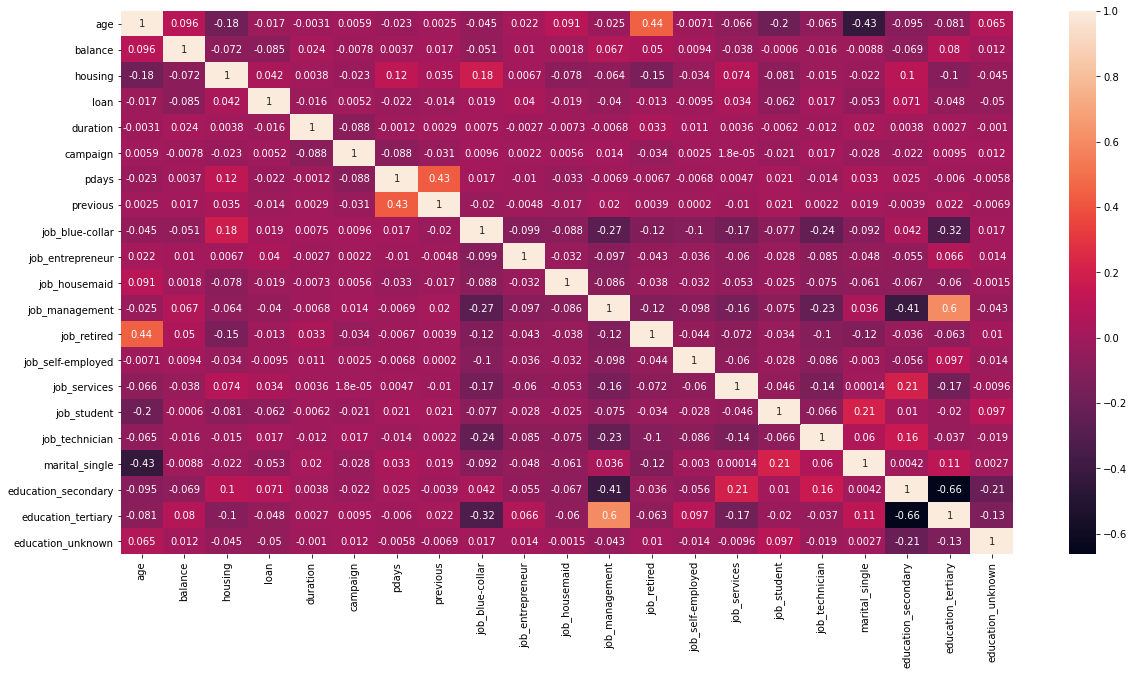

In [97]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[cols].corr(),annot = True)
plt.show()

In [98]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

44481    0.143342
25167    0.475595
40209    0.097189
30954    0.085349
26429    0.009424
9926     0.077891
5350     0.019740
27903    0.142228
19437    0.017675
21459    0.405965
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14334242, 0.47559537, 0.09718926, 0.08534925, 0.00942396,
       0.07789148, 0.01974022, 0.14222835, 0.0176754 , 0.4059654 ])

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.143342
1,0,0.475595
2,0,0.097189
3,0,0.085349
4,0,0.009424


In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.143342,0
1,0,0.475595,0
2,0,0.097189,0
3,0,0.085349,0
4,0,0.009424,0


In [103]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[27407   538]
 [ 2926   776]]


In [104]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.890542547476854


In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's check the sensitivity of our logistic regression model
TP / float(TP+FN)

0.20961642355483523

`It indicates that 20.96% of true positives or here in our case converted leads are predicted correctly by our model.

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.9807478976561103